In [517]:
import rclpy
from pi3hat_moteus_int_msgs.msg import JointsCommand,JointsStates
import rosbag2_api.read_bag as rb
import rosbag2_api.save_csv_file as csv_wrt
import os 
from matplotlib import pyplot as plt
import numpy as np
from statistics import mean,stdev

import mpld3
from matplotlib import rc 
mpld3.enable_notebook()
# %matplotlib widget

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [ ]:
name_package = os.getcwd()
name_folder = 'test_experiments_1004_terra_girato_video_vince_5_cavobloccato'
name_data = os.path.join(name_package, name_folder, name_folder + '_0.mcap')
print(name_data)
print(os.path.exists(name_data))

/home/michele/jumpsim_exp_ws/test_experiments_1004_terra_girato_video_vince_5_cavobloccato/test_experiments_1004_terra_girato_video_vince_5_cavobloccato_0.mcap
True


In [519]:
## useful param 
line_width = 3
font_size = 14
cond_cmd_big = 8.0
cond_cmd_big = 10.0
alpha = 0.5
alpha_grid = 1.0
linewidth_grid = 0.75
label_i = [r'Hip ', r'Knee'] 
WANNA_OPEN_FOLDER = False
WANNA_TOPIC = False

start_time = 0
end_time = 0.02
end_task_patch = 1.8

In [520]:
name_package = os.getcwd()
name_data = os.path.join(name_package, 'test_xml.csv')
print(name_data)
print(os.path.exists(name_data))

/home/michele/jumpsim_exp_ws/test_xml.csv
True


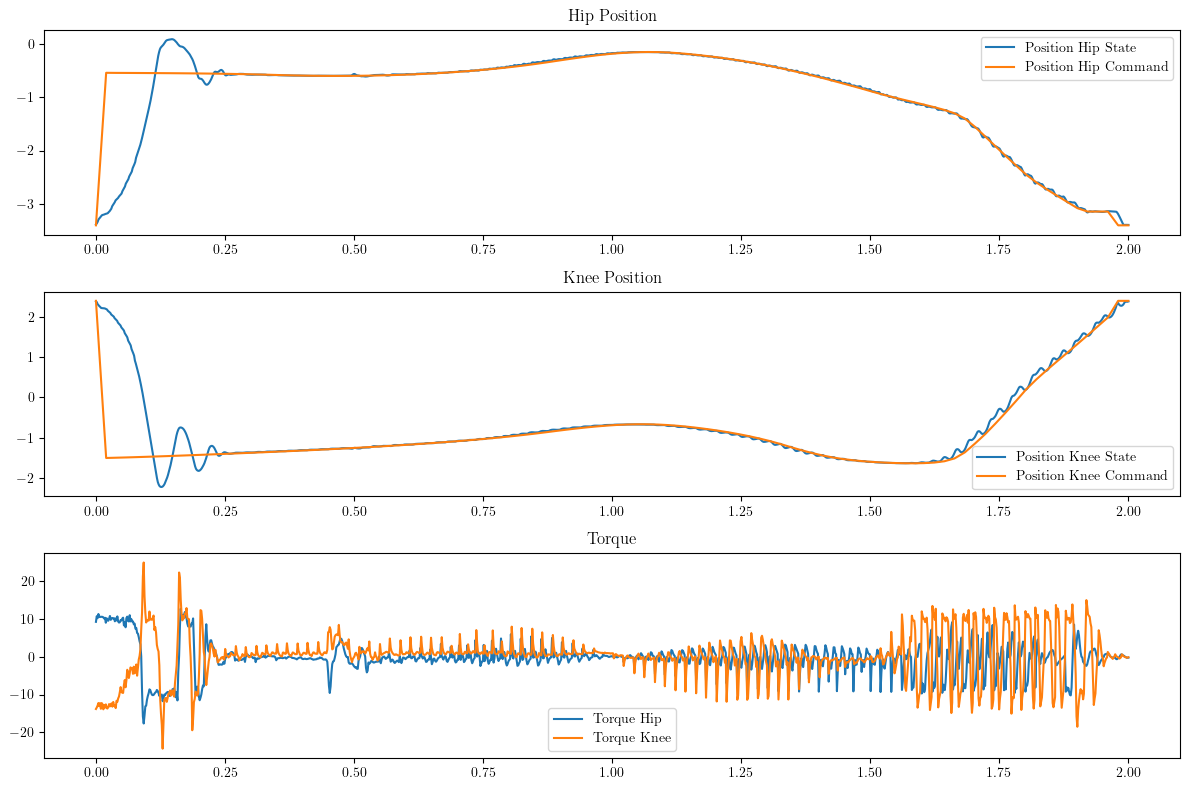

In [ ]:
import pandas as pd

df = pd.read_csv(name_data)
# print(df.head())
time = df['__time']
time = time - time[0]

pos_state_hip = df['/state_broadcaster/joints_state/position[0]']
vel_state_hip = df['/state_broadcaster/joints_state/velocity[0]']
pos_command_hip = df['/joint_controller/command/position[0]']

pos_command_knee = df['/joint_controller/command/position[1]']
pos_state_knee = df['/state_broadcaster/joints_state/position[1]']
vel_state_knee = df['/state_broadcaster/joints_state/velocity[1]']

torque_hip = df['/state_broadcaster/joints_state/effort[0]']	
torque_knee = df['/state_broadcaster/joints_state/effort[1]']

pos_state_hip = pos_state_hip.dropna()
pos_state_knee = pos_state_knee.dropna()
pos_command_hip = pos_command_hip.dropna()
pos_command_knee = pos_command_knee.dropna()
torque_hip = torque_hip.dropna()
torque_knee = torque_knee.dropna()
vel_state_hip = vel_state_hip.dropna()
vel_state_knee = vel_state_knee.dropna()


t_f = 2.0

pos_state_hip = np.array(pos_state_hip)
pos_state_knee = np.array(pos_state_knee)
pos_command_hip = np.array(pos_command_hip)
pos_command_knee = np.array(pos_command_knee)
torque_hip = np.array(torque_hip)
torque_knee = np.array(torque_knee)
vel_state_hip = np.array(vel_state_hip)
vel_state_knee = np.array(vel_state_knee)

index_pos_command_hip = np.logical_and(pos_command_hip > pos_command_hip[1] - 0.000001, pos_command_hip < 10.0)
index_pos_state_hip = np.logical_and(pos_state_hip > pos_state_hip[0] + 0.01, pos_state_hip < 10.0)
index_pos_state_knee = np.logical_and(pos_state_knee < pos_state_knee[0] - 0.01, pos_state_knee < 50.0)
index_pos_command_knee = np.logical_and(pos_command_knee < pos_command_knee[0] - 0.01, pos_command_knee < 50.0)
 

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(np.linspace(0,t_f,len(pos_state_hip[index_pos_state_hip])), pos_state_hip[index_pos_state_hip], label='Position Hip State')
plt.plot(np.linspace(0,t_f,len(pos_command_hip[115:-177])), pos_command_hip[115:-177], label='Position Hip Command')
plt.legend()
plt.grid()
plt.title('Hip Position')

plt.subplot(3, 1, 2)
plt.plot(np.linspace(0,t_f,len(pos_state_knee[index_pos_state_knee])), pos_state_knee[index_pos_state_knee], label='Position Knee State')
plt.plot(np.linspace(0,t_f,len(pos_command_knee[115:-177])), pos_command_knee[115:-177], label='Position Knee Command')
plt.legend()
plt.grid()
plt.title('Knee Position')

plt.subplot(3, 1, 3)
plt.plot(np.linspace(0,t_f,len(torque_hip[2500:-800])), torque_hip[2500:-800], label='Torque Hip')
plt.plot(np.linspace(0,t_f,len(torque_knee[2500:-800])), torque_knee[2500:-800], label='Torque Knee')
plt.legend()
plt.grid()
plt.title('Torque')

plt.tight_layout()
plt.show()


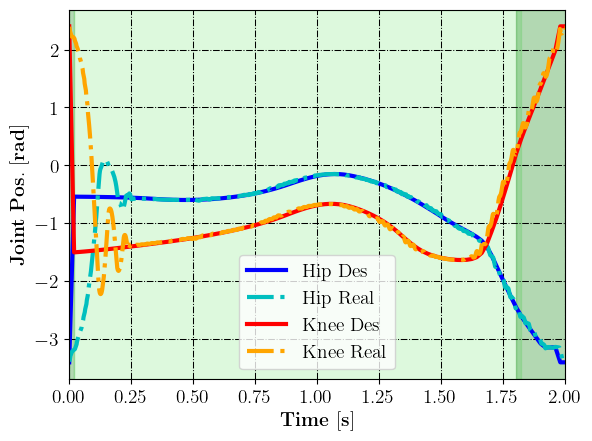

In [522]:
import matplotlib.patches as patches
import matplotlib.colors as mcolors

fig, ax = plt.subplots()
plt_bag_path = os.path.join(os.getcwd(), "_pos_plot.svg")

plt.plot(np.linspace(0,t_f,len(pos_command_hip[115:-177])), pos_command_hip[115:-177], linewidth=line_width, color='b', label=label_i[0] + r' Des')
plt.plot(np.linspace(0,t_f,len(pos_state_hip[index_pos_state_hip])), pos_state_hip[index_pos_state_hip], linewidth=line_width, color='c', linestyle='-.', label=label_i[0] + r' Real')

plt.plot(np.linspace(0,t_f,len(pos_command_knee[115:-177])), pos_command_knee[115:-177], linewidth=line_width, color='r', label=label_i[1] + r' Des')
plt.plot(np.linspace(0,t_f,len(pos_state_knee[index_pos_state_knee])), pos_state_knee[index_pos_state_knee], linewidth=line_width, color=[1.0, 165/255, 0.0], linestyle='-.', label=label_i[1] + r' Real')

plt.xlabel(r'$\mathbf{Time\,\, [s]}$', fontsize=font_size)
plt.ylabel(r'$\mathbf{Joint\,\, Pos.\,\, [rad]}$', fontsize=font_size)

plt.legend(fontsize=font_size, loc='best')
# plt.grid(alpha=alpha)

ax.add_patch(patches.Rectangle((start_time, plt.gca().get_ylim()[0]), end_time, plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0], color='green', alpha=0.3))
ax.add_patch(patches.Rectangle((end_time, plt.gca().get_ylim()[0]), end_task_patch, plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0], color='lightgreen', alpha=0.3))
ax.add_patch(patches.Rectangle((end_task_patch, plt.gca().get_ylim()[0]), t_f, plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0], color='green', alpha=0.3))

ax.set_xlim([0,t_f])
ax.xaxis.grid(True, linestyle='-.', linewidth=linewidth_grid, color='black', alpha=alpha_grid)
ax.yaxis.grid(True, linestyle='-.', linewidth=linewidth_grid, color='black', alpha=alpha_grid)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
# plt.grid(alpha=alpha, linestyle='--', linewidth=1.5)
plt.savefig(plt_bag_path)
plt.show()

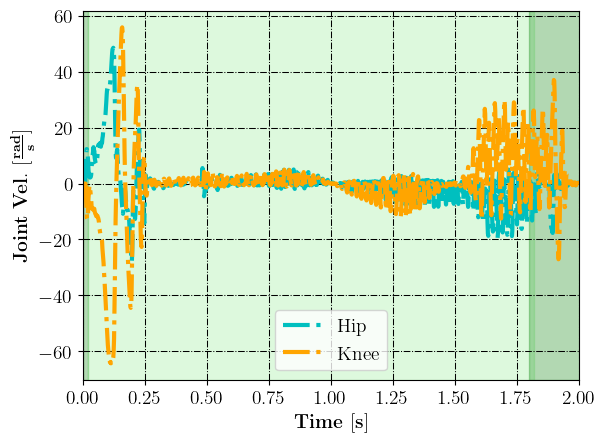

In [523]:
fig, ax = plt.subplots()
plt_bag_path = os.path.join(os.getcwd(), "_vel_plot.svg")

plt.plot(np.linspace(0,t_f,len(vel_state_hip[2475:-800])), vel_state_hip[2475:-800], linewidth=line_width, color= 'c', linestyle = '-.', label=label_i[0])
plt.plot(np.linspace(0,t_f,len(vel_state_knee[2475:-800])), vel_state_knee[2475:-800], linewidth=line_width, color= [1.0,165/255,0.0], linestyle = '-.', label=label_i[1])

plt.xlabel(r'$\mathbf{Time\,\, [s]}$', fontsize=font_size)  # Increase font size for time label
plt.ylabel(r'$\mathbf{Joint\,\, Vel.\,\, [\frac{rad}{s}]}$', fontsize=font_size)  # Increase font size for radians label

plt.legend(fontsize=font_size, loc='best') 
# plt.grid(alpha=alpha)  

ax.add_patch(patches.Rectangle((start_time, plt.gca().get_ylim()[0]), end_time, plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0], color='green', alpha=0.3))
ax.add_patch(patches.Rectangle((end_time, plt.gca().get_ylim()[0]), end_task_patch, plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0], color='lightgreen', alpha=0.3))
ax.add_patch(patches.Rectangle((end_task_patch, plt.gca().get_ylim()[0]), t_f, plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0], color='green', alpha=0.3))
ax.set_xlim([0, t_f])
ax.xaxis.grid(True, linestyle='-.', linewidth=linewidth_grid, color='black', alpha=alpha_grid)
ax.yaxis.grid(True, linestyle='-.', linewidth=linewidth_grid, color='black', alpha=alpha_grid)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.savefig(plt_bag_path)
plt.show() 

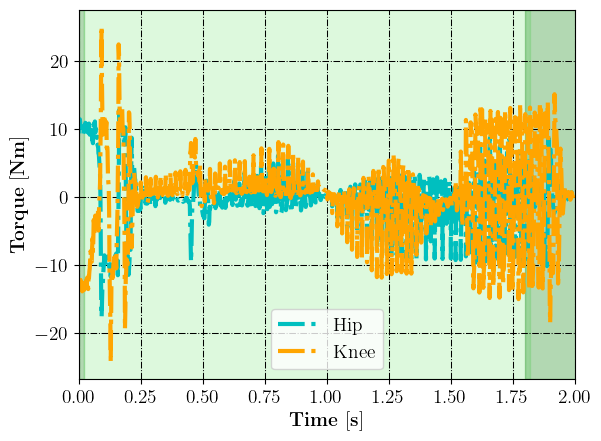

In [524]:
fig, ax = plt.subplots()
plt_bag_path = os.path.join(os.getcwd(), "_tor_plot.svg")
plt.plot(np.linspace(0,t_f,len(torque_hip[2500:-800])), torque_hip[2500:-800], linewidth=line_width, color='c', linestyle = '-.', label=label_i[0])
plt.plot(np.linspace(0,t_f,len(torque_knee[2500:-800])), torque_knee[2500:-800],linewidth=line_width, color=[1.0,165/255,0.0], linestyle = '-.', label=label_i[1])

plt.xlabel(r'$\mathbf{Time\,\, [s]}$', fontsize=font_size)  # Increase font size for time label
plt.ylabel(r'$\mathbf{Torque\,\, [Nm]}$', fontsize=font_size)  # Increase font size for radians label

plt.legend(fontsize=font_size) 
plt.grid(alpha=alpha)  
plt.savefig(plt_bag_path)

ax.add_patch(patches.Rectangle((start_time, plt.gca().get_ylim()[0]), end_time - start_time, plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0], color='green', alpha=0.3))
ax.add_patch(patches.Rectangle((end_time, plt.gca().get_ylim()[0]), end_task_patch, plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0], color='lightgreen', alpha=0.3))
ax.add_patch(patches.Rectangle((end_task_patch, plt.gca().get_ylim()[0]), t_f, plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0], color='green', alpha=0.3))
ax.set_xlim([0, t_f])
ax.xaxis.grid(True, linestyle='-.', linewidth=linewidth_grid, color='black', alpha=alpha_grid)
ax.yaxis.grid(True, linestyle='-.', linewidth=linewidth_grid, color='black', alpha=alpha_grid)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
# plt.grid(alpha=alpha, linestyle='--', linewidth=1.5)
plt.savefig(plt_bag_path)
plt.show() 